In [52]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report,confusion_matrix,balanced_accuracy_score
s=pd.read_csv(r"C:\Users\SRINU\Downloads\archive (1)\loan\train_u6lujuX_CVtuZ9i (1).csv")
df=pd.DataFrame(s)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df["Credit_History"].mode()[0],inplace=True)
print(df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64


C:\Users\SRINU\AppData\Local\Temp\ipykernel_4844\1593183852.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
C:\Users\SRINU\AppData\Local\Temp\ipykernel_4844\1593183852.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [68]:
from sklearn.model_selection import train_test_split
x_s=df[['ApplicantIncome','CoapplicantIncome','Credit_History','LoanAmount']]
print(x_s)
y=df['Loan_Status']
x_tr,x_te,y_tr,y_te=train_test_split(x_s,y,test_size=0.2,random_state=42)
m=DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=42)
m.fit(x_tr,y_tr)
k=m.predict(x_te)
f=m.score(x_te,y_te)
te= pd.DataFrame([[5000,7000,1,300]],columns=['ApplicantIncome','CoapplicantIncome','Credit_History','LoanAmount'])
print(m.predict(te))
print("accurary:",round(f*100,2))
print("Balanced Accuracy:",round(balanced_accuracy_score(y_te,k)*100,2))
print(confusion_matrix(y_te,k))

     ApplicantIncome  CoapplicantIncome  Credit_History  LoanAmount
0           0.781444           0.000000             1.0  146.412162
1           0.777849           0.759578             1.0  128.000000
2           0.771272           0.000000             1.0   66.000000
3           0.768841           0.767331             1.0  120.000000
4           0.781813           0.000000             1.0  141.000000
..               ...                ...             ...         ...
609         0.770727           0.000000             1.0   71.000000
610         0.776185           0.000000             1.0   40.000000
611         0.785997           0.719849             1.0  253.000000
612         0.785130           0.000000             1.0  187.000000
613         0.777849           0.000000             0.0  133.000000

[614 rows x 4 columns]
['N']
accurary: 78.86
Balanced Accuracy: 70.31
[[18 25]
 [ 1 79]]


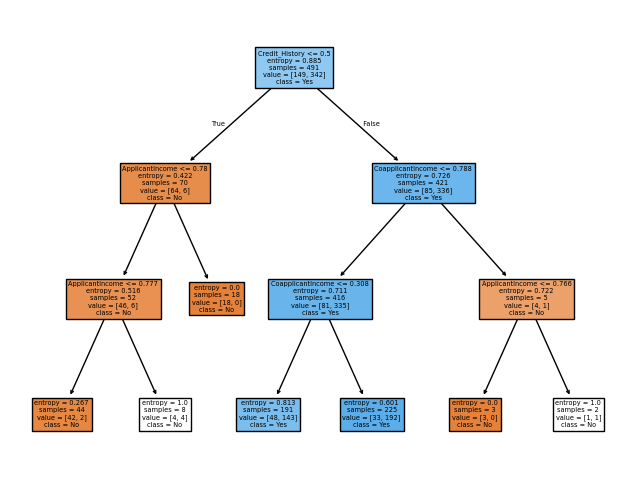

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plot_tree(m,feature_names=x_s.columns,class_names=["No", "Yes"],filled=True)
plt.show()